In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [2]:
df=pd.read_csv('Titanic_dataset.csv')
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [4]:
df.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

In [5]:
df['Embarked'].fillna(df['Embarked'].median,inplace=True)

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

### EDA

In [8]:
df.drop(columns='Passengerid',axis=1,inplace=True)

In [9]:
df.columns

Index(['Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1', 'zero.2', 'zero.3',
       'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7', 'zero.8', 'zero.9',
       'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'Pclass',
       'zero.15', 'zero.16', 'Embarked', 'zero.17', 'zero.18', '2urvived'],
      dtype='object')

In [10]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  , 22.5 , 18.5 ,
       67.  , 76.  , 26.5 , 60.5 , 11.5 ,  0.33,  0.17, 38.5 ])

C:\Users\Shashree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Count Plot of Age'}, xlabel='Age', ylabel='count'>

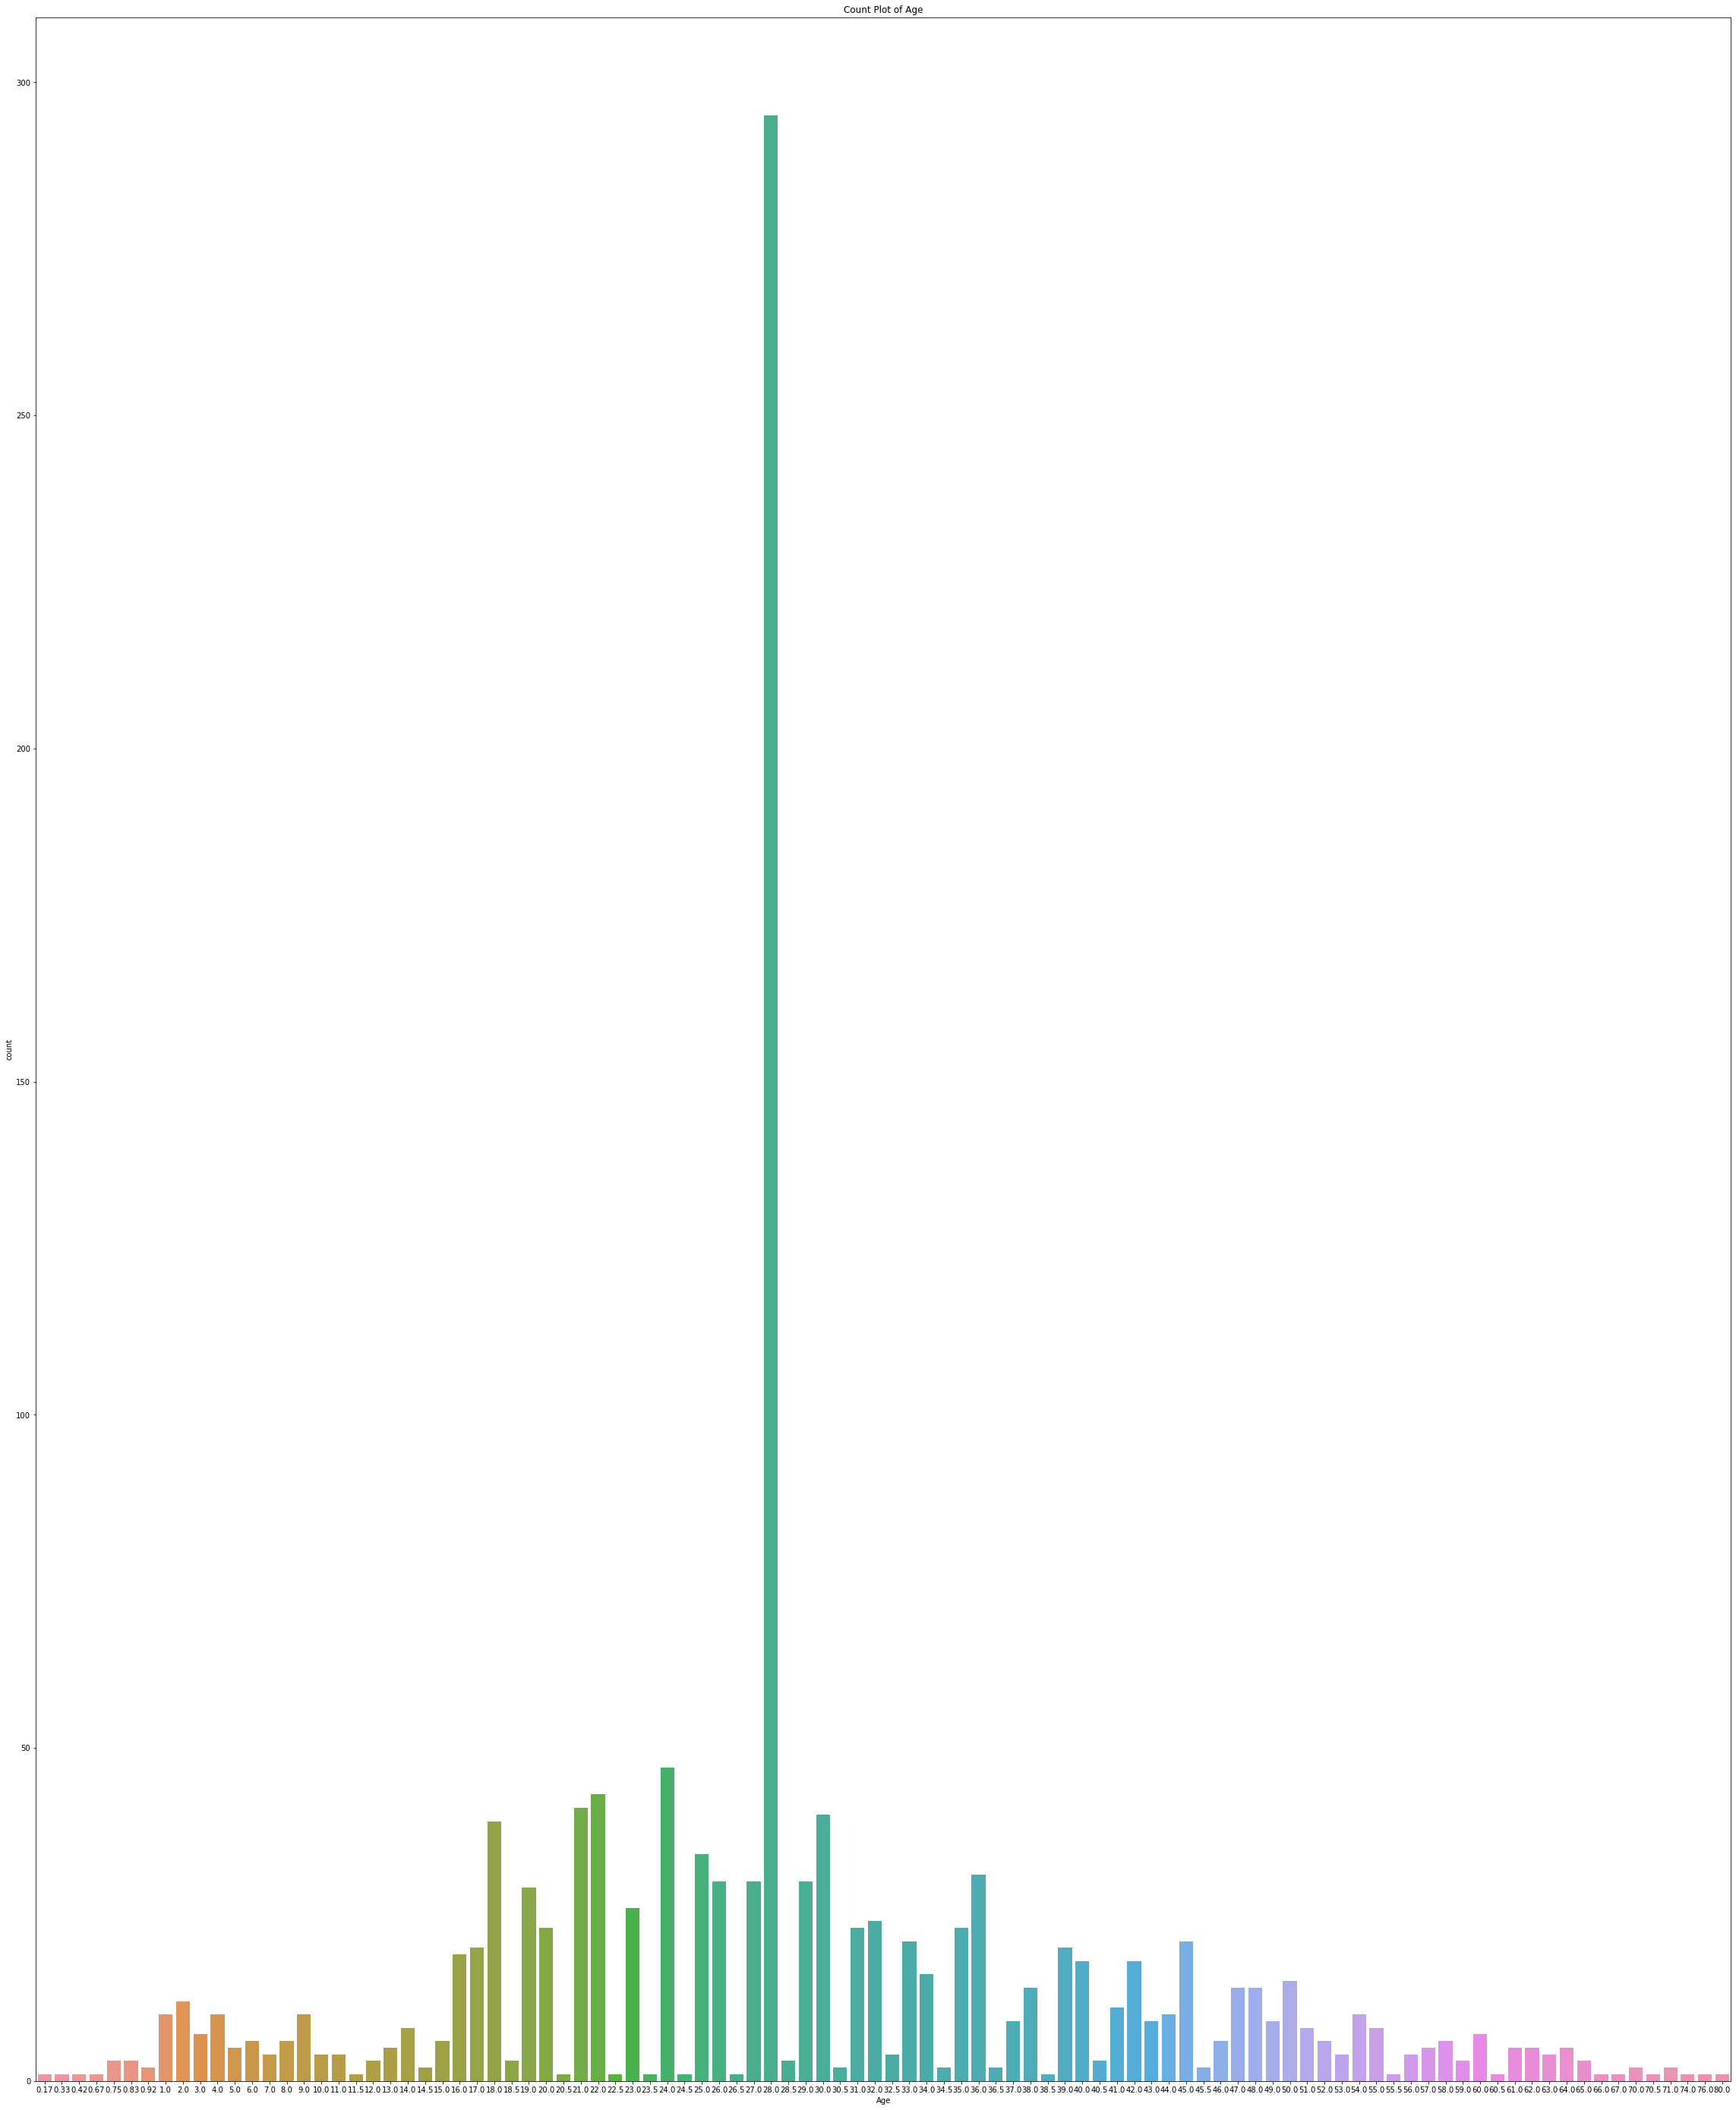

In [11]:
plt.figure(figsize=(40,50))
plt.title("Count Plot of Age")
sns.countplot(df['Age'])

In [12]:
df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

C:\Users\Shashree\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Dist Plot of Fare'}, xlabel='Fare', ylabel='Density'>

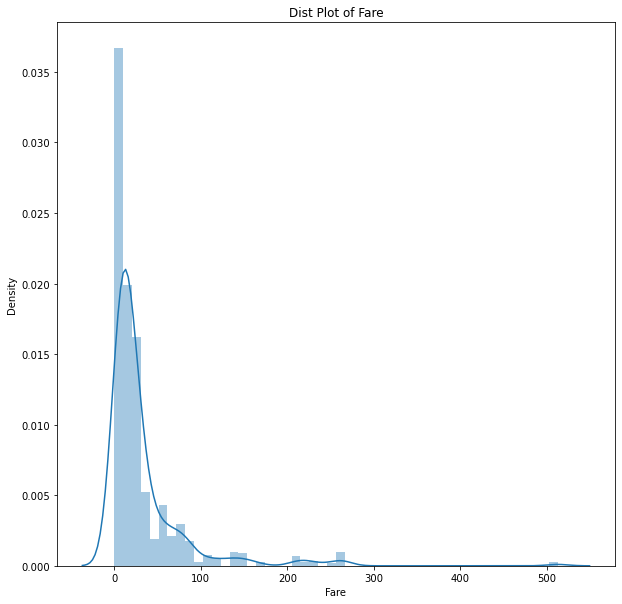

In [13]:
plt.figure(figsize=(10,10))
plt.title("Dist Plot of Fare")
sns.distplot(df['Fare'])

In [14]:
df['Sex'].unique()

array([0, 1], dtype=int64)

C:\Users\Shashree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Count Plot of Sex'}, xlabel='Sex', ylabel='count'>

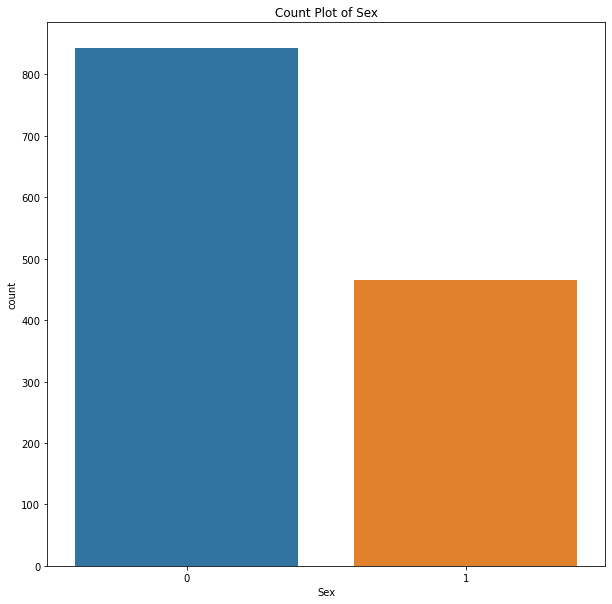

In [15]:
plt.figure(figsize=(10,10))
plt.title("Count Plot of Sex")
sns.countplot(df['Sex'])

In [16]:
df.columns

Index(['Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1', 'zero.2', 'zero.3',
       'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7', 'zero.8', 'zero.9',
       'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'Pclass',
       'zero.15', 'zero.16', 'Embarked', 'zero.17', 'zero.18', '2urvived'],
      dtype='object')

In [17]:
df['sibsp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

C:\Users\Shashree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Count Plot of sibsp'}, xlabel='sibsp', ylabel='count'>

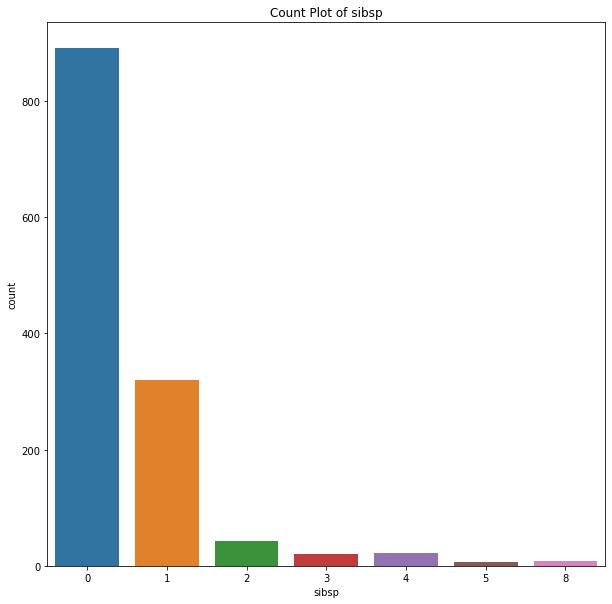

In [18]:
plt.figure(figsize=(10,10))
plt.title("Count Plot of sibsp")
sns.countplot(df['sibsp'])

In [19]:
df['zero'].unique()

array([0], dtype=int64)

C:\Users\Shashree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Count Plot of zero'}, xlabel='zero', ylabel='count'>

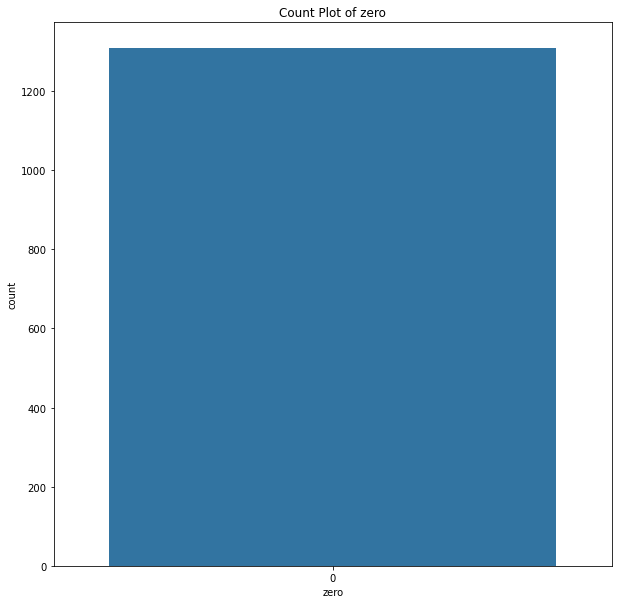

In [20]:
plt.figure(figsize=(10,10))
plt.title("Count Plot of zero")
sns.countplot(df['zero'])

In [21]:
df['zero.1'].unique()

array([0], dtype=int64)

In [22]:
df['zero.2'].unique()

array([0], dtype=int64)

In [23]:
df['zero.3'].unique()

array([0], dtype=int64)

In [24]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6, 9], dtype=int64)

C:\Users\Shashree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Count Plot of Parch'}, xlabel='Parch', ylabel='count'>

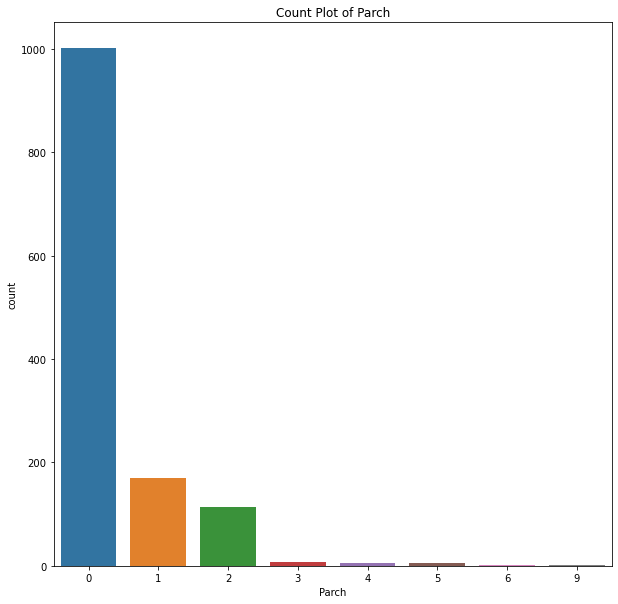

In [25]:
plt.figure(figsize=(10,10))
plt.title("Count Plot of Parch")
sns.countplot(df['Parch'])

In [26]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

C:\Users\Shashree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Count Plot of Pclass'}, xlabel='Pclass', ylabel='count'>

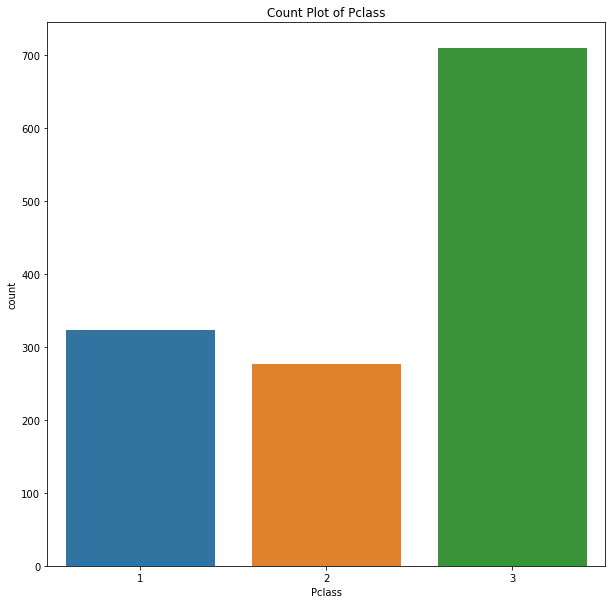

In [27]:
plt.figure(figsize=(10,10))
plt.title("Count Plot of Pclass")
sns.countplot(df['Pclass'])

In [28]:
df.columns

Index(['Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1', 'zero.2', 'zero.3',
       'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7', 'zero.8', 'zero.9',
       'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'Pclass',
       'zero.15', 'zero.16', 'Embarked', 'zero.17', 'zero.18', '2urvived'],
      dtype='object')

In [29]:
df['Embarked'].unique()

array([2.0, 0.0, 1.0,
       <bound method NDFrame._add_numeric_operations.<locals>.median of 0       2.0
       1       0.0
       2       2.0
       3       2.0
       4       2.0
              ...
       1304    2.0
       1305    0.0
       1306    2.0
       1307    2.0
       1308    0.0
       Name: Embarked, Length: 1309, dtype: object>                                ],
      dtype=object)

In [30]:
df['2urvived'].unique()

array([0, 1], dtype=int64)

C:\Users\Shashree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Count Plot of 2urvived'}, xlabel='2urvived', ylabel='count'>

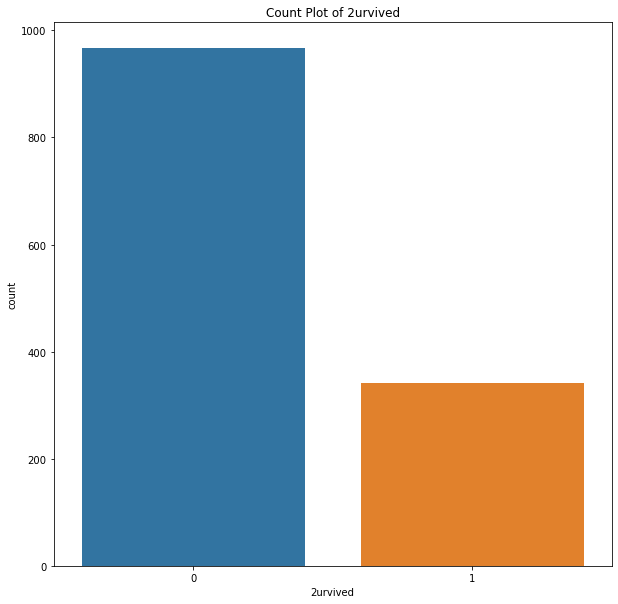

In [31]:
plt.figure(figsize=(10,10))
plt.title("Count Plot of 2urvived")
sns.countplot(df['2urvived'])

In [32]:
type(df['Embarked'])

pandas.core.series.Series

In [33]:
type(df['2urvived'])

pandas.core.series.Series

In [34]:
df['Embarked']

0       2.0
1       0.0
2       2.0
3       2.0
4       2.0
       ... 
1304    2.0
1305    0.0
1306    2.0
1307    2.0
1308    0.0
Name: Embarked, Length: 1309, dtype: object

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1309 non-null   float64
 1   Fare      1309 non-null   float64
 2   Sex       1309 non-null   int64  
 3   sibsp     1309 non-null   int64  
 4   zero      1309 non-null   int64  
 5   zero.1    1309 non-null   int64  
 6   zero.2    1309 non-null   int64  
 7   zero.3    1309 non-null   int64  
 8   zero.4    1309 non-null   int64  
 9   zero.5    1309 non-null   int64  
 10  zero.6    1309 non-null   int64  
 11  Parch     1309 non-null   int64  
 12  zero.7    1309 non-null   int64  
 13  zero.8    1309 non-null   int64  
 14  zero.9    1309 non-null   int64  
 15  zero.10   1309 non-null   int64  
 16  zero.11   1309 non-null   int64  
 17  zero.12   1309 non-null   int64  
 18  zero.13   1309 non-null   int64  
 19  zero.14   1309 non-null   int64  
 20  Pclass    1309 non-null   int6

In [36]:
df['Embarked']=pd.to_numeric(df['Embarked'],errors = 'coerce')

In [37]:
df['Embarked']

0       2.0
1       0.0
2       2.0
3       2.0
4       2.0
       ... 
1304    2.0
1305    0.0
1306    2.0
1307    2.0
1308    0.0
Name: Embarked, Length: 1309, dtype: float64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1309 non-null   float64
 1   Fare      1309 non-null   float64
 2   Sex       1309 non-null   int64  
 3   sibsp     1309 non-null   int64  
 4   zero      1309 non-null   int64  
 5   zero.1    1309 non-null   int64  
 6   zero.2    1309 non-null   int64  
 7   zero.3    1309 non-null   int64  
 8   zero.4    1309 non-null   int64  
 9   zero.5    1309 non-null   int64  
 10  zero.6    1309 non-null   int64  
 11  Parch     1309 non-null   int64  
 12  zero.7    1309 non-null   int64  
 13  zero.8    1309 non-null   int64  
 14  zero.9    1309 non-null   int64  
 15  zero.10   1309 non-null   int64  
 16  zero.11   1309 non-null   int64  
 17  zero.12   1309 non-null   int64  
 18  zero.13   1309 non-null   int64  
 19  zero.14   1309 non-null   int64  
 20  Pclass    1309 non-null   int6

In [39]:
df['Embarked'].unique()

array([ 2.,  0.,  1., nan])

In [40]:
df['Embarked'].fillna(df['Embarked'].median(),inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1309 non-null   float64
 1   Fare      1309 non-null   float64
 2   Sex       1309 non-null   int64  
 3   sibsp     1309 non-null   int64  
 4   zero      1309 non-null   int64  
 5   zero.1    1309 non-null   int64  
 6   zero.2    1309 non-null   int64  
 7   zero.3    1309 non-null   int64  
 8   zero.4    1309 non-null   int64  
 9   zero.5    1309 non-null   int64  
 10  zero.6    1309 non-null   int64  
 11  Parch     1309 non-null   int64  
 12  zero.7    1309 non-null   int64  
 13  zero.8    1309 non-null   int64  
 14  zero.9    1309 non-null   int64  
 15  zero.10   1309 non-null   int64  
 16  zero.11   1309 non-null   int64  
 17  zero.12   1309 non-null   int64  
 18  zero.13   1309 non-null   int64  
 19  zero.14   1309 non-null   int64  
 20  Pclass    1309 non-null   int6

In [42]:
df['zero.18'].unique()

array([0], dtype=int64)

In [43]:
df.rename(columns={'2urvived':'survived'},inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1309 non-null   float64
 1   Fare      1309 non-null   float64
 2   Sex       1309 non-null   int64  
 3   sibsp     1309 non-null   int64  
 4   zero      1309 non-null   int64  
 5   zero.1    1309 non-null   int64  
 6   zero.2    1309 non-null   int64  
 7   zero.3    1309 non-null   int64  
 8   zero.4    1309 non-null   int64  
 9   zero.5    1309 non-null   int64  
 10  zero.6    1309 non-null   int64  
 11  Parch     1309 non-null   int64  
 12  zero.7    1309 non-null   int64  
 13  zero.8    1309 non-null   int64  
 14  zero.9    1309 non-null   int64  
 15  zero.10   1309 non-null   int64  
 16  zero.11   1309 non-null   int64  
 17  zero.12   1309 non-null   int64  
 18  zero.13   1309 non-null   int64  
 19  zero.14   1309 non-null   int64  
 20  Pclass    1309 non-null   int6

In [45]:
df.corr()

,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,survived
Age,1.000000,0.178182,-0.053663,-0.189972,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.377908,NaN,NaN,-0.063424,NaN,NaN,-0.055862
Fare,0.178182,1.000000,0.185681,0.160349,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.558683,NaN,NaN,-0.238131,NaN,NaN,0.173786
Sex,-0.053663,0.185681,1.000000,0.109609,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.124617,NaN,NaN,-0.097960,NaN,NaN,0.404020
sibsp,-0.189972,0.160349,0.109609,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.060832,NaN,NaN,0.065567,NaN,NaN,-0.014375
zero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zero.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zero.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zero.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zero.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zero.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

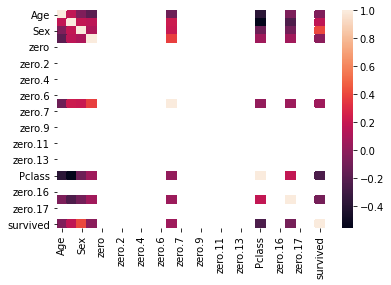

In [46]:
sns.heatmap(df.corr())

In [47]:
df.columns

Index(['Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1', 'zero.2', 'zero.3',
       'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7', 'zero.8', 'zero.9',
       'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'Pclass',
       'zero.15', 'zero.16', 'Embarked', 'zero.17', 'zero.18', 'survived'],
      dtype='object')

In [48]:
df.drop(['zero','zero.1','zero.2','zero.3','zero.4','zero.5','zero.6','zero.7'],axis=1,inplace=True)

<AxesSubplot:>

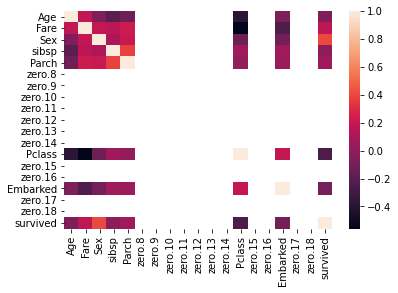

In [49]:
sns.heatmap(df.corr())

In [50]:
df.columns

Index(['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'zero.8', 'zero.9', 'zero.10',
       'zero.11', 'zero.12', 'zero.13', 'zero.14', 'Pclass', 'zero.15',
       'zero.16', 'Embarked', 'zero.17', 'zero.18', 'survived'],
      dtype='object')

In [51]:
df.drop(['zero.8','zero.9','zero.10','zero.11','zero.12','zero.13','zero.14','zero.15','zero.16','zero.17','zero.18'],axis=1,inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1309 non-null   float64
 1   Fare      1309 non-null   float64
 2   Sex       1309 non-null   int64  
 3   sibsp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Pclass    1309 non-null   int64  
 6   Embarked  1309 non-null   float64
 7   survived  1309 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 81.9 KB


<AxesSubplot:title={'center':'Correlation Plot'}>

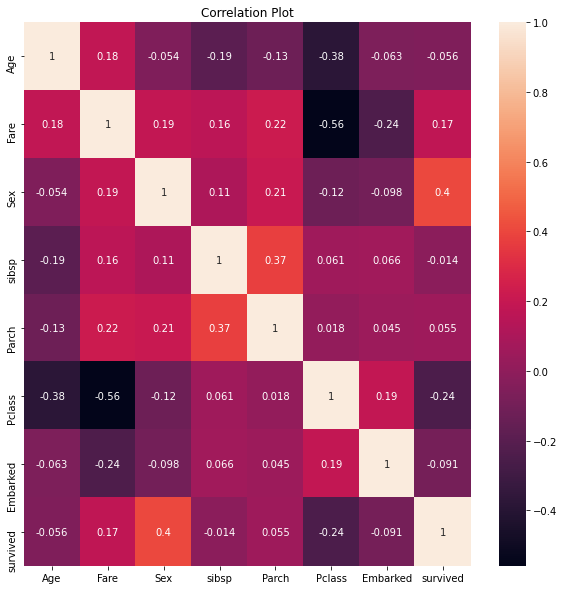

In [53]:
plt.figure(figsize=(10,10))
plt.title("Correlation Plot")
sns.heatmap(df.corr(),annot=True)

### Model Building

In [54]:
x=df.drop('survived',axis=1)
y=df['survived']

In [55]:
x.shape

(1309, 7)

In [56]:
y.shape

(1309,)

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

### 1. Logistic Regression

In [58]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [59]:
y_pred_lr=lr.predict(x_test)

In [60]:
y_pred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0],
      dtype=int64)

In [61]:
acc_score_lr=accuracy_score(y_test,y_pred_lr)
acc_score_lr

0.7404580152671756

In [62]:
con_mat_lr=confusion_matrix(y_test,y_pred_lr)
con_mat_lr

array([[167,  15],
       [ 53,  27]], dtype=int64)

In [63]:
cls_rpt_lr=classification_report(y_test,y_pred_lr)
print(cls_rpt_lr)

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       182
           1       0.64      0.34      0.44        80

    accuracy                           0.74       262
   macro avg       0.70      0.63      0.64       262
weighted avg       0.72      0.74      0.71       262



### 2. Decision Tree

In [64]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [65]:
y_pred_dt=dt.predict(x_test)
acc_score_dt=accuracy_score(y_test,y_pred_dt)
print("Accuracy Score=\n",acc_score_dt)
con_mtx_dt=confusion_matrix(y_test,y_pred_dt)
print("Confusion Matrix=\n",con_mtx_dt)
cls_rpt_dt=classification_report(y_test,y_pred_dt)
print("Classification report=\n",cls_rpt_dt)


Accuracy Score=
 0.6717557251908397
Confusion Matrix=
 [[150  32]
 [ 54  26]]
Classification report=
               precision    recall  f1-score   support

           0       0.74      0.82      0.78       182
           1       0.45      0.33      0.38        80

    accuracy                           0.67       262
   macro avg       0.59      0.57      0.58       262
weighted avg       0.65      0.67      0.65       262



#### 3. Random Forest

In [66]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [67]:
y_pred_rf=rf.predict(x_test)
acc_score_rf=accuracy_score(y_test,y_pred_rf)
print("Accuracy Score of Random Forest=\n",acc_score_rf)
con_mtx_rf=confusion_matrix(y_test,y_pred_rf)
print("Confusion Matrix of RF=\n",con_mtx_rf)
class_report_rf=classification_report(y_test,y_pred_rf)
print("Classification Report of RF=\n",class_report_rf)

Accuracy Score of Random Forest=
 0.7022900763358778
Confusion Matrix of RF=
 [[157  25]
 [ 53  27]]
Classification Report of RF=
               precision    recall  f1-score   support

           0       0.75      0.86      0.80       182
           1       0.52      0.34      0.41        80

    accuracy                           0.70       262
   macro avg       0.63      0.60      0.61       262
weighted avg       0.68      0.70      0.68       262



#### 4. AdaBoost Classifier

In [68]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [69]:
y_pred_ada=ada.predict(x_test)
acc_score_ada=accuracy_score(y_test,y_pred_ada)
print('Accuracy Score of Ada=\n',acc_score_ada)
con_matx_ada=confusion_matrix(y_test,y_pred_ada)
print("Confusion Matrix of Ada=\n",con_matx_ada)
class_report_ada=classification_report(y_test,y_pred_ada)
print("Classification Report of Ada=\n",class_report_ada)

Accuracy Score of Ada=
 0.7290076335877863
Confusion Matrix of Ada=
 [[167  15]
 [ 56  24]]
Classification Report of Ada=
               precision    recall  f1-score   support

           0       0.75      0.92      0.82       182
           1       0.62      0.30      0.40        80

    accuracy                           0.73       262
   macro avg       0.68      0.61      0.61       262
weighted avg       0.71      0.73      0.70       262



### Pickling the Model

In [70]:
import pickle
filename='lr_model.pkl'

In [71]:
pickle.dump(lr,open(filename,'wb'))
load_model=pickle.load(open(filename,'rb'))

#### Testing on Unseen data

In [72]:
x_train.columns

Index(['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked'], dtype='object')

In [73]:
x_train.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked
62,45.0,83.4750,0,1,0,1,2.0
503,37.0,9.5875,1,0,0,3,2.0
745,70.0,71.0000,0,1,1,1,2.0
1154,1.0,12.1833,1,1,1,3,2.0
826,28.0,56.4958,0,0,0,3,2.0


In [74]:
data=[[32,12,1,1,0,1,2]]
new_df=pd.DataFrame(data,columns=['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked'])
single=lr.predict(new_df)
single

array([1], dtype=int64)

In [75]:
result=load_model.score(x_test,y_test)
result

0.7404580152671756

C:\Users\Shashree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

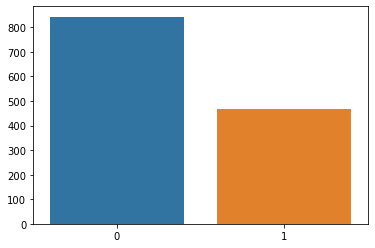

In [76]:
sns.barplot(list(df['Sex'].value_counts().keys()),list(df['Sex'].value_counts()))

In [77]:
df['Embarked'].unique()

array([2., 0., 1.])